In [1]:
# -*- coding: utf-8 -*-
##########################
## Autoencoder CIFAR-10 ##
##########################
import torch
import torch.nn as nn
import torchvision as tv
import torchvision.transforms as transforms
from torch.autograd import Variable

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
config = dict(
  num_epochs = 10,
  batch_size = 32,
  weight_decay = 1e-5,
  )

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = tv.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)

dataloader = torch.utils.data.DataLoader(trainset, batch_size = config['batch_size'], shuffle = False, num_workers = 4)


Extracting ./data/cifar-10-python.tar.gz to ./data


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [4]:
# Autoencoder class
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    # Encoder
    self.encoder = nn.Sequential(
        nn.Conv2d(3,6, kernel_size = 3),
        nn.LeakyReLU(inplace = True),
        nn.Conv2d(6,4, kernel_size = 3),
        nn.LeakyReLU(inplace = True),
        nn.Conv2d(4,3, kernel_size = 3),
        nn.LeakyReLU(inplace = True),
    )
    # Decoder
    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(3,4, kernel_size = 3),
        nn.LeakyReLU(inplace = True),
        nn.ConvTranspose2d(4,6, kernel_size = 3),
        nn.LeakyReLU(inplace = True),
        nn.ConvTranspose2d(6,3, kernel_size = 3),
        nn.LeakyReLU(inplace = True)
    )
    
  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x


In [5]:
model = Autoencoder().cpu()
distance = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001, weight_decay = config['weight_decay'])

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch [1/10], loss:0.0549
epoch [2/10], loss:0.0440
epoch [3/10], loss:0.0409
epoch [4/10], loss:0.0396
epoch [5/10], loss:0.0384
epoch [6/10], loss:0.0368
epoch [7/10], loss:0.0350
epoch [8/10], loss:0.0341
epoch [9/10], loss:0.0334
epoch [10/10], loss:0.0328


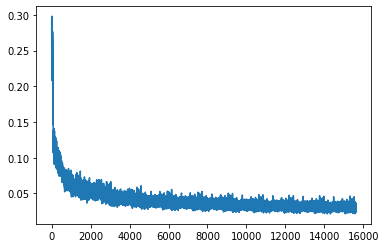

In [6]:
losses = []
for epoch in range(config['num_epochs']):
    for data in dataloader:
        img, _ = data
        img = Variable(img).cpu()
        # Forward step
        output = model(img)
        loss = distance(output, img)
        losses.append(loss.item())
        # Backward step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, config['num_epochs'], loss.item()))

import matplotlib.pyplot as plt
plt.plot(losses)

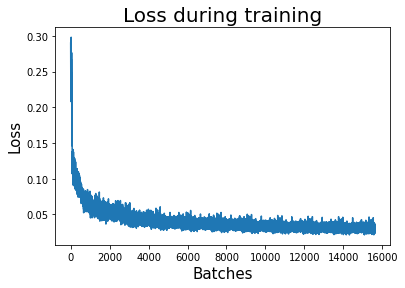

In [7]:
plt.plot(losses)
plt.title('Loss during training', fontsize=20)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Batches', fontsize=15)
plt.savefig('loss.png')

In [ ]:
plexamples = enumerate(dataloader)
batch_idx, (example_data, example_targets) = next(examples)
out = model(example_data)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

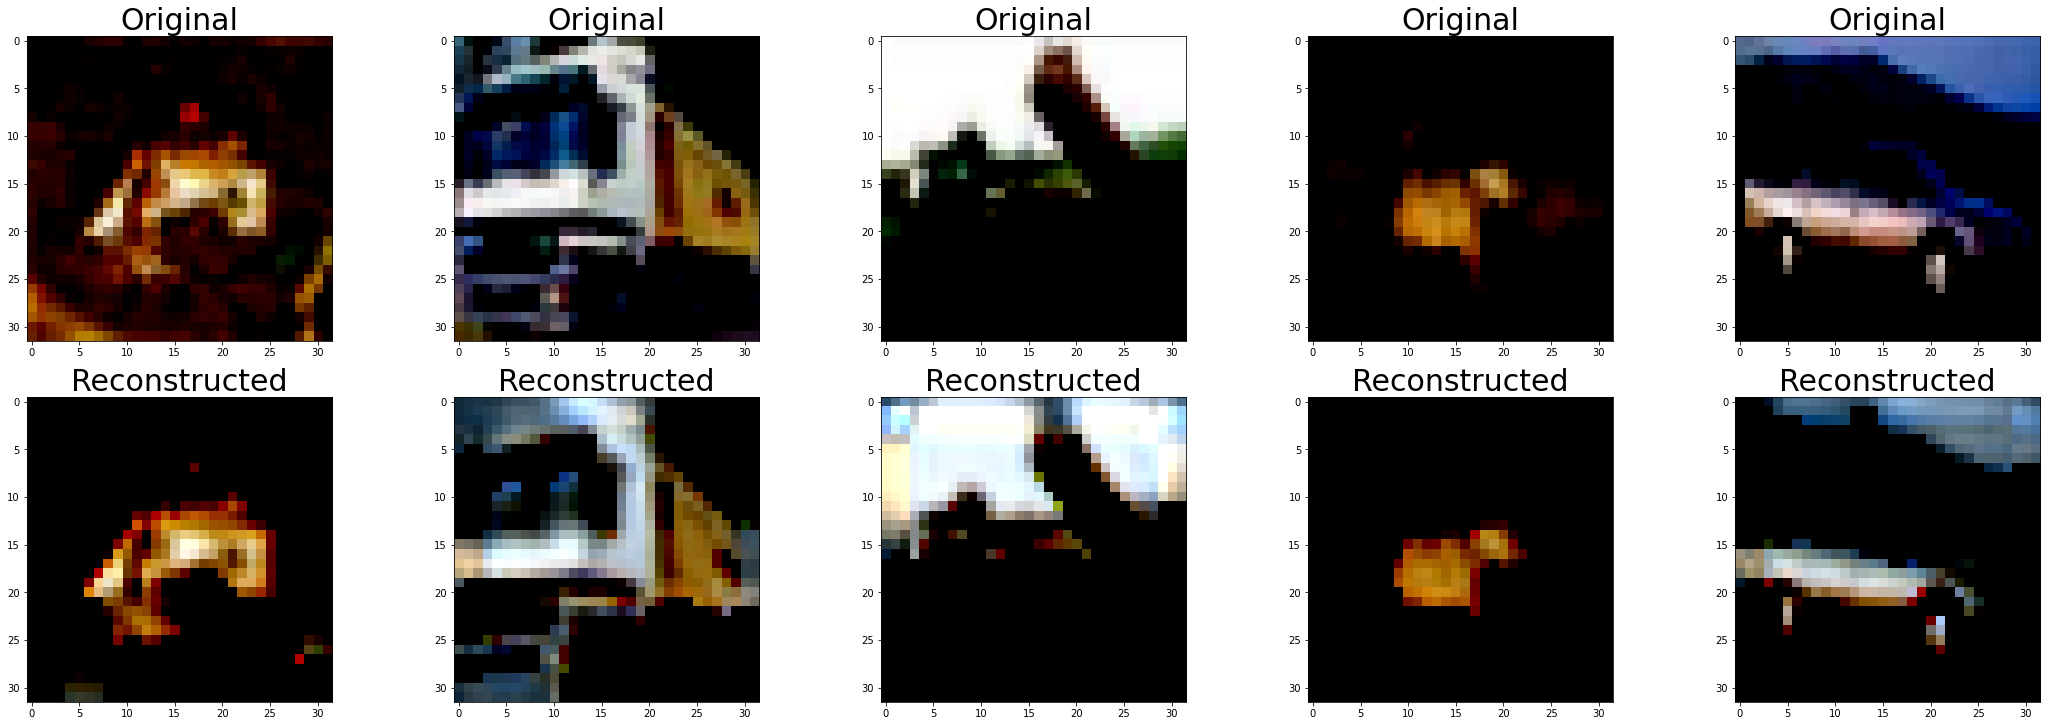

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(30, 10))

for i in range(5):
  original = np.moveaxis(example_data[i].detach().numpy(), 0, 2)
  axs[0, i].imshow(original, interpolation = 'none')
  axs[0, i].set_title('Original', fontsize=30)

  reconstructed = np.moveaxis(out[i].detach().numpy(), 0, 2)
  axs[1, i].imshow(reconstructed, interpolation = 'none')
  axs[1, i].set_title('Reconstructed', fontsize=30)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig('imgs_test.png')